<a href="https://colab.research.google.com/github/ferdonof/topicos-2/blob/master/clasificar_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programa de clasificación de números**

# 1 - Obtención de los datos

Obtenemos los datos a partir de MNIST
Mnist provee imágenes de 28x28 pixels.


In [1]:
from tensorflow import keras
from keras.datasets import mnist
data = mnist.load_data()



## 2 - Pre procesamiento de los datos
Debemos dividir los datos en datos de entrenamiento y datos para testing.

In [2]:
(train_x, train_y), (test_x, test_y) = data

### Normalización de los datos

Divido los datos en 255, para que esos valores se encuentren entre 0 y 1

In [3]:
train_x = train_x / 255.0
test_x = test_x / 255.0

## 3 - Armado de la red neuronal


In [4]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()

# Carga de los filtros de la red
model.add(Convolution2D(filters=64, kernel_size=3, padding='same', activation='relu',
                             input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))


model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Se aplana el modelo
model.add(Flatten())

model.add(Dense(64, activation="relu"))

# Capa de salida (10 digitos)
model.add(Dense(10, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

## 4 - Entrenamiento

In [5]:

from keras.optimizers.optimizer_v2.adam import Adam
from keras.optimizers.optimizer_v2.nadam import Nadam

learning_rate = 0.01
loss_function = 'sparse_categorical_crossentropy'
batch_size = 1000
epochs = 10

model.compile(optimizer=Adam(learning_rate = learning_rate), loss=loss_function, metrics = ['accuracy'])

model.fit(train_x, train_y, verbose=2, batch_size = batch_size, epochs = epochs)


Epoch 1/10
60/60 - 7s - loss: 0.8007 - accuracy: 0.7283 - 7s/epoch - 111ms/step
Epoch 2/10
60/60 - 3s - loss: 0.0703 - accuracy: 0.9781 - 3s/epoch - 52ms/step
Epoch 3/10
60/60 - 3s - loss: 0.0446 - accuracy: 0.9863 - 3s/epoch - 50ms/step
Epoch 4/10
60/60 - 3s - loss: 0.0329 - accuracy: 0.9895 - 3s/epoch - 49ms/step
Epoch 5/10
60/60 - 3s - loss: 0.0317 - accuracy: 0.9896 - 3s/epoch - 47ms/step
Epoch 6/10
60/60 - 3s - loss: 0.0237 - accuracy: 0.9922 - 3s/epoch - 45ms/step
Epoch 7/10
60/60 - 3s - loss: 0.0191 - accuracy: 0.9937 - 3s/epoch - 45ms/step
Epoch 8/10
60/60 - 3s - loss: 0.0164 - accuracy: 0.9944 - 3s/epoch - 45ms/step
Epoch 9/10
60/60 - 3s - loss: 0.0163 - accuracy: 0.9947 - 3s/epoch - 45ms/step
Epoch 10/10
60/60 - 3s - loss: 0.0126 - accuracy: 0.9958 - 3s/epoch - 45ms/step


## 5 - Evaluar resultado

In [6]:

result = model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9893


313/313 [==============================] - 1s 2ms/step


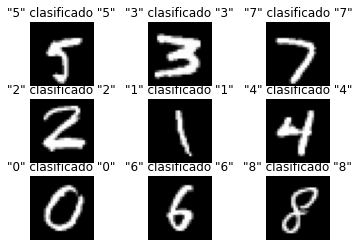

In [7]:
import numpy as np
import matplotlib.pyplot as plt

pred_y = model.predict(test_x)
pred_y = np.argmax(pred_y, axis=-1)
images = np.random.randint(0, 10000, 9)


for i in range(9):
  image = images[i]
  original_image = test_x[image, :]
  original_label = test_y[image]
  prediction_label = pred_y[image]

  plt.subplot(3, 3, i+1)
  plt.imshow(original_image, cmap='gray')
  plt.axis('off')
  plt.title('"{}" clasificado "{}"'.format(original_label, prediction_label))